#인공지능과 가위 바위 보 하기

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


In [ ]:
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


###이미지를 불러와 리사이즈 하기

In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path_1 = "/content/drive/MyDrive/rock_scissor_paper/scissor"
resize_images(image_dir_path_1)
image_dir_path_2 = "/content/drive/MyDrive/test/scissor"
resize_images(image_dir_path_2)

print("가위 이미지 resize 완료!")

300  images to be resized.
300  images resized.
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path_1 = "/content/drive/MyDrive/rock_scissor_paper/rock"
resize_images(image_dir_path_1)
image_dir_path_2 = "/content/drive/MyDrive/test/rock"
resize_images(image_dir_path_2)


print("바위 이미지 resize 완료!")

300  images to be resized.
300  images resized.
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path_1 = "/content/drive/MyDrive/rock_scissor_paper/paper"
resize_images(image_dir_path_1)
image_dir_path_2 = "/content/drive/MyDrive/test/paper"
resize_images(image_dir_path_2)

print("보 이미지 resize 완료!")

300  images to be resized.
300  images resized.
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


##Train 셋과 Test 셋을 만드는 특별한 함수 load_data() 정의

In [ ]:
import numpy as np

def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/rock_scissor_paper/"
(x_train, y_train)=load_data(image_dir_path,900)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)
최소값: 11  최대값: 255


###불러온 train 이미지 예

라벨:  0


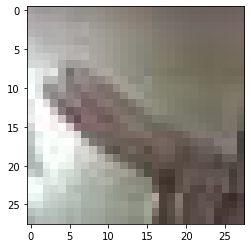

In [ ]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

#모델 설계하기

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=15
_channel_2=32
n_dense=20
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) #3종류의 클래스 (가위, 바위, 보)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 32)               

##Train 셋 만들어서 모델 훈련시키기

In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
(x_train, y_train) = load_data("/content/drive/MyDrive/rock_scissor_paper",900)
print("Before Reshape - x_train shape: {}".format(x_train.shape))
print("Before Reshape - y_train shape: {}".format(y_train.shape))

x_train_norm = x_train/255.0  # 입력은 0~1 사이의 값으로 정규화
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)
# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
y_train = y_train.reshape(-1, 1)

print("After Reshape - x_train_reshape shape: {}".format(x_train_reshaped.shape))
print("After Reshape - y_train shape: {}".format(y_train.shape))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=10)

PIL 라이브러리 import 완료!
학습데이터(x_train)의 이미지 개수는 900 입니다.
Before Reshape - x_train shape: (900, 28, 28, 3)
Before Reshape - y_train shape: (900,)
After Reshape - x_train_reshape shape: (900, 28, 28, 3)
After Reshape - y_train shape: (900, 1)
Epoch 1/10
29/29 [==============================] - 1s 22ms/step - loss: 1.0959 - accuracy: 0.4033
Epoch 2/10
29/29 [==============================] - 1s 20ms/step - loss: 1.0606 - accuracy: 0.4289
Epoch 3/10
29/29 [==============================] - 1s 21ms/step - loss: 0.9350 - accuracy: 0.6500
Epoch 4/10
29/29 [==============================] - 1s 20ms/step - loss: 0.6892 - accuracy: 0.7011
Epoch 5/10
29/29 [==============================] - 1s 20ms/step - loss: 0.5228 - accuracy: 0.7856
Epoch 6/10
29/29 [==============================] - 1s 20ms/step - loss: 0.4045 - accuracy: 0.8344
Epoch 7/10
29/29 [==============================] - 1s 20ms/step - loss: 0.3567 - accuracy: 0.8400
Epoch 8/10
29/29 [==============================] - 1s 20ms/step - lo

##Test 셋 만들어서 모델 검증하기

In [ ]:
(x_test, y_test) = load_data("/content/drive/MyDrive/test",300)

print("Before Reshape - x_test shape: {}".format(x_test.shape))
print("Before Reshape - y_test shape: {}".format(y_test.shape))
x_test_norm = x_test/255.0
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 3)
y_test = y_test.reshape(-1, 1)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))
print("After Reshape - y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
Before Reshape - x_test shape: (300, 28, 28, 3)
Before Reshape - y_test shape: (300,)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)
After Reshape - y_test shape: (300, 1)


##손실과 정확도 구하기

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.6362 - accuracy: 0.6567 - 204ms/epoch - 20ms/step
test_loss: 1.6362090110778809 
test_accuracy: 0.6566666960716248


회고 : 처음에는 주어진 가위 바위 보 체계에 대한 트레인 셋과 테스트 셋의 정의가 헷갈려 에러가 많이 떴었는데 load_data()함수가 이미지와 레이블을 반환한다는 것을 알고부터 쉽게 코드를 짤 수 있었다. 처음에 아무것도 모르고 코드를 붙여넣기하고 돌렸을 때는 정확도가 0.09(9%)가 나와서 정말 실망을 많이 했지만 생각을 가다듬고 정신을 집중하고 train 셋에 들어갈 다양한 가위바위보 사진을 다양한 각도로 3배 증강해서 찍은 결과 정확도가 0.65(65%)로써 60퍼센트를 넘길 수 있었다.